In [ ]:
import kagglehub

path = kagglehub.dataset_download("szrlee/stock-time-series-20050101-to-20171231")

print("Path to dataset files:", path)

100%|██████████| 3.03M/3.03M [00:00<00:00, 127MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/szrlee/stock-time-series-20050101-to-20171231/versions/3


In [ ]:
import pandas as pd
with open(path + '/IBM_2006-01-01_to_2018-01-01.csv', "rt") as f:
    lines = f.readlines()

data = [line.strip().split(",")for line in lines]

df = pd.DataFrame(data[1:], columns=data[0])
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Close'] = pd.to_numeric(df['Close'])
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.2,82.5,81.33,81.95,9840600,IBM
2,2006-01-05,81.4,82.9,81.0,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.1,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...,...
3015,2017-12-22,151.82,153.0,151.5,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.5,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.2,154.12,153.2,154.04,2687624,IBM


In [ ]:
import pandas as pd

data = pd.read_csv(path + '/IBM_2006-01-01_to_2018-01-01.csv')
data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...,...
3015,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM


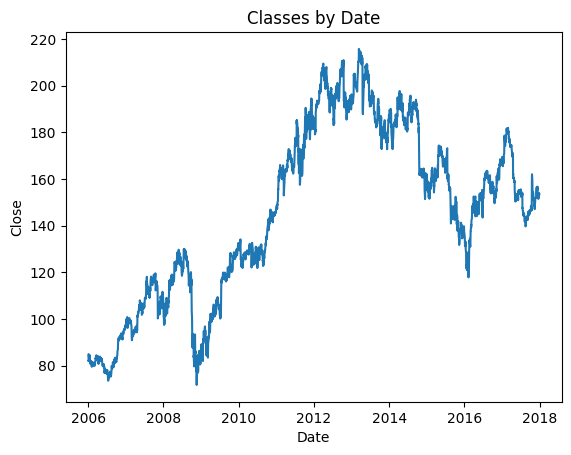

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = df['Date']
y = df['Close']
plt.plot(df.Date, df.Close)

plt.title('Classes by Date')

plt.xlabel('Date')
plt.ylabel('Close')

plt.show()


(2960, 60)
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0014 - loss: 0.0699 - val_accuracy: 0.0000e+00 - val_loss: 0.0013
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 2.8327e-04 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 8.2168e-04
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 2.9803e-04 - loss: 8.9104e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.5728e-04
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 5.7975e-04 - loss: 6.4602e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.3401e-04
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0017 - loss: 4.2208e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.5153e-04
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0010 - loss: 4.4462e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.1693e-04
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0016 - loss: 5.9185e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.9083e-04
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

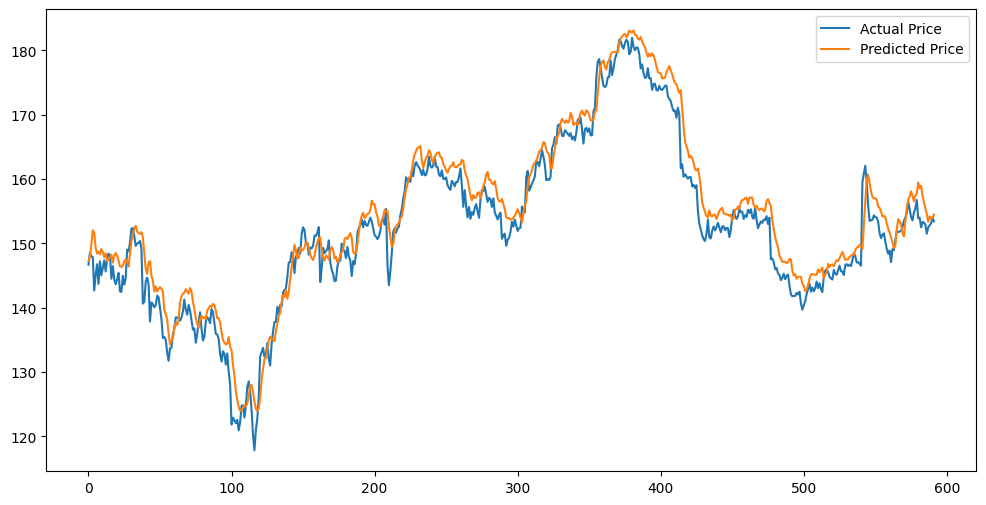

RMSE: 3.1687


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df1 = df[["Date","Close"]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df1['Close'].values.reshape(-1,1))

def create_dataset(data, window_size = 60):
  X,y = [], []
  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i,0])
    y.append(data[i,0])
  return np.array(x), np.array(y)

window_size = 60

X, y = create_dataset(scaled_data, window_size)
print(X.shape)
X = np.reshape(X, (X.shape[0], X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=(X_train.shape[1])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(y_pred_scaled, label='Predicted Price')
plt.legend()
plt.show()

rmse_fnn = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled)**2)))
print(f"RMSE: {rmse_fnn:.4f}")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 9.1752e-04 - loss: 0.0786 - val_accuracy: 0.0000e+00 - val_loss: 0.0015
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 9.4328e-04 - loss: 9.8925e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.9180e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0010 - loss: 7.7241e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.7789e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 6.3598e-04 - loss: 7.5815e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0021
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.0013 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 3.5474e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 9.7609e-04 - loss: 5.0783e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.9179e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0017 - loss: 9.4671e-04 - val_accuracy: 0.0000e+00 - val_loss: 3.3561e-04
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 

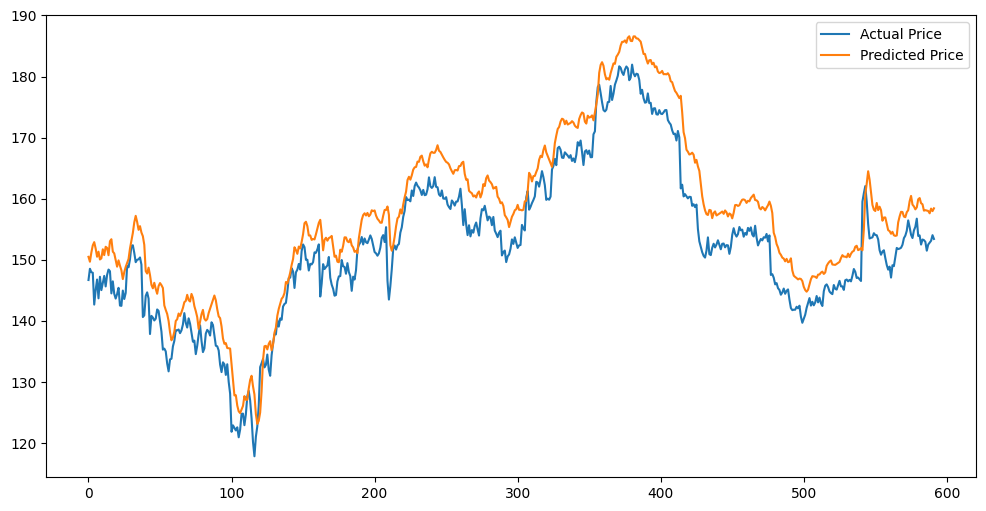

RMSE: 5.4745


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

df2 = df[["Date","Close"]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2['Close'].values.reshape(-1,1))

def create_dataset(data, window_size = 60):
  X,y = [], []
  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i,0])
    y.append(data[i,0])
  return np.array(x), np.array(y)

window_size = 60
X , y = create_dataset(scaled_data, window_size)

X = np.reshape(X, (X.shape[0], X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=64, return_sequences=False))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(y_pred_scaled, label='Predicted Price')
plt.legend()
plt.show()

rmse_rnn = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled)**2)))
print(f"RMSE: {rmse_rnn:.4f}")

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 7.8644e-04 - loss: 0.0627 - val_accuracy: 0.0000e+00 - val_loss: 7.5403e-04
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 7.8195e-04 - loss: 8.7243e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.2165e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 3.1494e-04 - loss: 8.9499e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.6752e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 1.8621e-04 - loss: 8.1238e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.5720e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 7.5973e-04 - loss: 7.0465e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.4713e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 4.3680e-04 - loss: 7.7686e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.6300e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - accuracy: 0.0017 - loss: 7.8537e-04 - val_accuracy: 0.0000e+00 - val_loss: 9.7711e-04
Epoch 8/

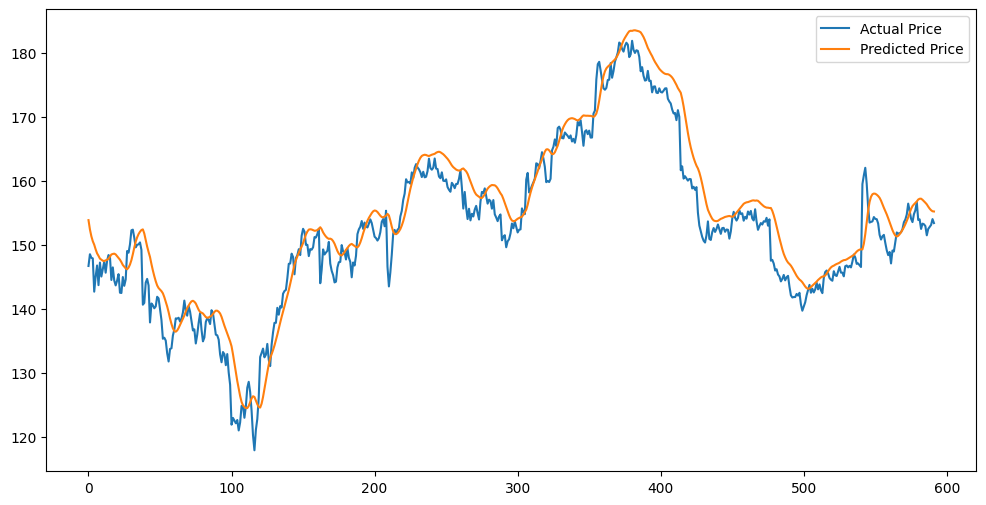

RMSE: 3.8384


In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

df2 = df[["Date","Close"]]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df2['Close'].values.reshape(-1,1))

def create_dataset(data, window_size = 60):
  X,y = [], []
  if len(data) >= window_size:
    for i in range(window_size, len(data)):
      X.append(data[i-window_size:i,0])
      y.append(data[i,0])
  return np.array(X), np.array(y)

window_size = 60
X , y = create_dataset(scaled_data, window_size)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_data=(X_test, y_test), verbose=1)

y_pred = model.predict(X_test)

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_scaled = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(y_pred_scaled, label='Predicted Price')
plt.legend()
plt.show()

rmse_rnn = np.sqrt(np.mean(((y_test_scaled - y_pred_scaled)**2)))
print(f"RMSE: {rmse_rnn:.4f}")